In [13]:
#Import our dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
from config import weather_api_key
import requests

In [8]:
#create url for weather maps
weathermap_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + '&q='

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print('Beginning of Data Retrieval      ')
print('---------------------------      ')

#create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >=50):
        set_count +=1
        record_count = 1
        time.sleep(2)
        
    ## Create endpoint URL with each city.    
    city_url = weathermap_url + city.replace(" ", "+")
    #print(city_url)
     # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of set {set_count}|{city}')
    #Add 1 to the record count
    record_count +=1
    
    #Run an API request for each of the cities
    try:
        #Parse the JSON file and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']

        #convert data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        #append the city information into city_data list 
        city_data.append({'City':city.title(),
                          'Country': city_country,
                          'Date':city_date,
                          'Lat':city_lat,
                          'Lng':city_lon,
                          'Max Temp':city_max_temp,
                          'Humidity':city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind})

    #If an error is experienced, skip the city
    except:
        print('City not found. Skipping...')
        pass

print('------------------------------------')
print('Data Retrieval Complete             ')
print('------------------------------------')


Beginning of Data Retrieval      
---------------------------      
Processing Record 1 of set 1|mandan
Processing Record 2 of set 1|lakes entrance
Processing Record 3 of set 1|illoqqortoormiut
City not found. Skipping...
Processing Record 4 of set 1|saldanha
Processing Record 5 of set 1|hanko
Processing Record 6 of set 1|havre-saint-pierre
Processing Record 7 of set 1|lavrentiya
Processing Record 8 of set 1|hilo
Processing Record 9 of set 1|mandalgovi
Processing Record 10 of set 1|shasta lake
Processing Record 11 of set 1|rikitea
Processing Record 12 of set 1|talnakh
Processing Record 13 of set 1|nizhneyansk
City not found. Skipping...
Processing Record 14 of set 1|mataura
Processing Record 15 of set 1|barentsburg
City not found. Skipping...
Processing Record 16 of set 1|constitucion
Processing Record 17 of set 1|leningradskiy
Processing Record 18 of set 1|thompson
Processing Record 19 of set 1|juifang
City not found. Skipping...
Processing Record 20 of set 1|chokurdakh
Processing Rec

Processing Record 43 of set 4|acapulco
Processing Record 44 of set 4|katha
City not found. Skipping...
Processing Record 45 of set 4|the valley
Processing Record 46 of set 4|namatanai
Processing Record 47 of set 4|colombo
Processing Record 48 of set 4|ostrovnoy
Processing Record 49 of set 4|bardiyah
Processing Record 50 of set 4|salimpur
Processing Record 1 of set 5|lebu
Processing Record 2 of set 5|balykshi
Processing Record 3 of set 5|yellowknife
Processing Record 4 of set 5|leszno
Processing Record 5 of set 5|ketchikan
Processing Record 6 of set 5|springbok
Processing Record 7 of set 5|bamnet narong
Processing Record 8 of set 5|harper
Processing Record 9 of set 5|la asuncion
Processing Record 10 of set 5|puerto escondido
Processing Record 11 of set 5|luderitz
Processing Record 12 of set 5|olinda
Processing Record 13 of set 5|shimoda
Processing Record 14 of set 5|klaksvik
Processing Record 15 of set 5|naberera
Processing Record 16 of set 5|mayo
Processing Record 17 of set 5|edson
Pro

Processing Record 41 of set 8|vanderhoof
Processing Record 42 of set 8|talesh
City not found. Skipping...
Processing Record 43 of set 8|teluknaga
Processing Record 44 of set 8|skagastrond
City not found. Skipping...
Processing Record 45 of set 8|new london
Processing Record 46 of set 8|lemesos
City not found. Skipping...
Processing Record 47 of set 8|arman
Processing Record 48 of set 8|ranfurly
Processing Record 49 of set 8|mrirt
City not found. Skipping...
Processing Record 50 of set 8|villa de reyes
Processing Record 1 of set 9|krasnogvardeyskiy
Processing Record 2 of set 9|kayerkan
Processing Record 3 of set 9|batagay-alyta
Processing Record 4 of set 9|kavaratti
Processing Record 5 of set 9|zyryanka
Processing Record 6 of set 9|kikwit
Processing Record 7 of set 9|salinopolis
Processing Record 8 of set 9|grand river south east
City not found. Skipping...
Processing Record 9 of set 9|khasan
Processing Record 10 of set 9|korla
Processing Record 11 of set 9|upington
Processing Record 12

Processing Record 34 of set 12|chagda
City not found. Skipping...
Processing Record 35 of set 12|paradwip
City not found. Skipping...
Processing Record 36 of set 12|beringovskiy
Processing Record 37 of set 12|jalu
Processing Record 38 of set 12|warqla
City not found. Skipping...
Processing Record 39 of set 12|nador
Processing Record 40 of set 12|beisfjord
Processing Record 41 of set 12|yumen
Processing Record 42 of set 12|maniitsoq
Processing Record 43 of set 12|biak
Processing Record 44 of set 12|truth or consequences
Processing Record 45 of set 12|ouesso
Processing Record 46 of set 12|gornopravdinsk
Processing Record 47 of set 12|payo
Processing Record 48 of set 12|polunochnoye
Processing Record 49 of set 12|high level
Processing Record 50 of set 12|sechura
Processing Record 1 of set 13|meyungs
City not found. Skipping...
Processing Record 2 of set 13|gravdal
Processing Record 3 of set 13|mabai
Processing Record 4 of set 13|saint-georges
Processing Record 5 of set 13|madison
Processi

In [11]:
print(len(city_data))

567


In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mandan,US,2022-10-13 03:36:33,46.8267,-100.8896,50.36,45,100,27.63
1,Lakes Entrance,AU,2022-10-13 03:40:25,-37.8811,147.9810,64.17,78,100,16.44
2,Saldanha,ZA,2022-10-13 03:40:26,-33.0117,17.9442,57.25,91,78,14.88
3,Hanko,FI,2022-10-13 03:40:26,59.8333,22.9500,51.44,77,35,16.71
4,Havre-Saint-Pierre,CA,2022-10-13 03:40:28,50.2334,-63.5986,41.00,93,0,2.30


In [19]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'

#Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [30]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']
print(lats)

0      46.8267
1     -37.8811
2     -33.0117
3      59.8333
4      50.2334
        ...   
562    12.3500
563    65.2820
564    35.7565
565   -11.0964
566    25.5384
Name: Lat, Length: 567, dtype: float64


In [24]:
#Get today's date

today = time.time()
today

1665634317.061639

In [26]:
today = time.strftime('%x')
today

'10/12/22'

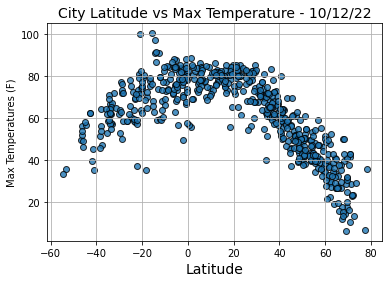

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps,
           edgecolor='black', linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph opportunities
plt.title(f'City Latitude vs Max Temperature - {today}', fontsize = '14')
plt.xlabel("Latitude", fontsize = '14')
plt.ylabel("Max Temperatures (F)")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

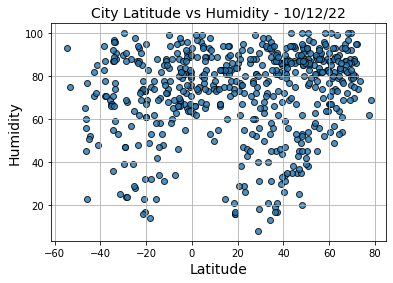

In [38]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, humidity,
           edgecolor='black', linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph opportunities
plt.title(f'City Latitude vs Humidity - {today}', fontsize = '14')
plt.xlabel("Latitude", fontsize = '14')
plt.ylabel("Humidity", fontsize = '14')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

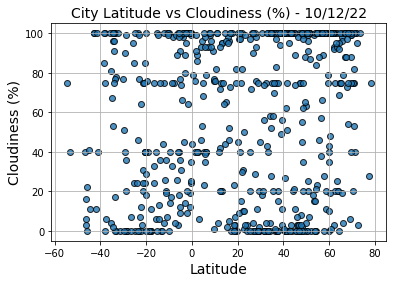

In [39]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, cloudiness,
           edgecolor='black', linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph opportunities
plt.title(f'City Latitude vs Cloudiness (%) - {today}', fontsize = '14')
plt.xlabel("Latitude", fontsize = '14')
plt.ylabel("Cloudiness (%)", fontsize = '14')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

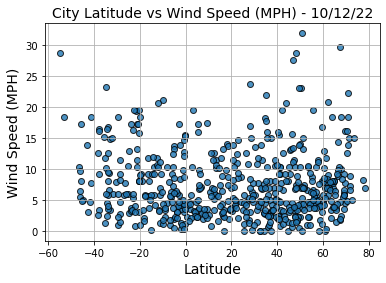

In [40]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, wind_speed,
           edgecolor='black', linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph opportunities
plt.title(f'City Latitude vs Wind Speed (MPH) - {today}', fontsize = '14')
plt.xlabel("Latitude", fontsize = '14')
plt.ylabel("Wind Speed (MPH)", fontsize = '14')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()